<a href="https://colab.research.google.com/github/atakishiyevamalak/MachineLearningProjects/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis(PCA)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:

from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m,3))            # Initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi           # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5     # oval
X += 0.28 * np.random.randn(m, 3)   # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

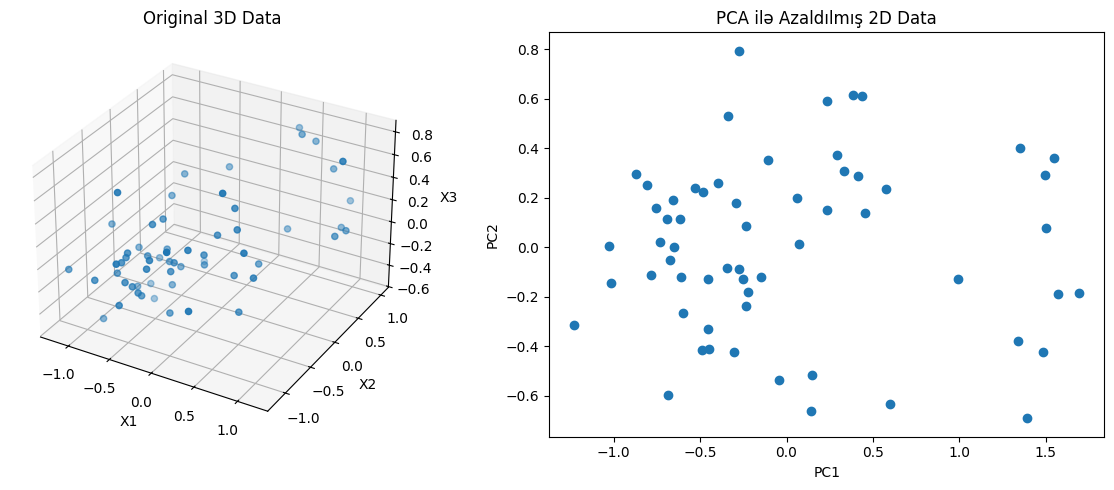

In [39]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_title("Original 3D Data")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(X2D[:,0], X2D[:,1])
ax2.set_title("PCA ilə Azaldılmış 2D Data")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")

plt.tight_layout()
plt.show()

In [40]:
X2D.shape

(60, 2)

In [41]:
pca.components_   # ayiran xettlere compnent deyilir ve bunlar o vektorlarin value-laridi

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

In [42]:
pca.explained_variance_ratio_     # her kechirdiyi vektorda hansi qeder data var faizle onu gosterir. Birinci kechirdiyi vektorda 75%, ikincide 15% data var

array([0.7578477 , 0.15186921])

In [43]:
1 - pca.explained_variance_ratio_.sum()             # ne qeder datani itirdiyimizi bilmek uchun 1 (100%) -den  componentlerde olan data miqdarinin cemini chixiriq


np.float64(0.09028309326742057)

ne qeder data itirmeye haziriqsa o qeder reduction edirik dimensionality

In [44]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')     #parser oze duzgun bolsun deye
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1                             # datanin 95% den choxunu saxlayan hali tapir

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ,
       0.65424256, 0.66430969, 0.67384542, 0.68297086, 0.69180491,
       0.7001981 , 0.70832389, 0.71618755, 0.72363488, 0.73054347,
       0.73712441, 0.74360589, 0.74963204, 0.75549786, 0.76119807,
       0.76663435, 0.77169222, 0.7765708 , 0.7813851 , 0.78610776,
       0.79067523, 0.79512359, 0.7993086 , 0.80329076, 0.8071405 ,
       0.81089154, 0.81451162, 0.81802754, 0.82142812, 0.82464686,
       0.82783703, 0.83096508, 0.83392491, 0.83681446, 0.83965576,
       0.84237012, 0.84506533, 0.84765006, 0.85018776, 0.85263557,
       0.85504063, 0.85743326, 0.85973735, 0.86195267, 0.86408988,
       0.86616213, 0.86819256, 0.87016038, 0.87208891, 0.87397523,
       0.875845  , 0.87765583, 0.87943146, 0.88118044, 0.88283

In [46]:
d

np.int64(154)

In [47]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [48]:
pca.n_components_

np.int64(154)

In [49]:
%%time
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

CPU times: user 52 s, sys: 119 ms, total: 52.1 s
Wall time: 56.1 s


0.9706

In [50]:
test_reduced = pca.transform(X_test)

In [51]:
%%time
rfc.fit(X_reduced, y_train)

CPU times: user 2min 14s, sys: 130 ms, total: 2min 14s
Wall time: 2min 16s


RandomForestClassifier()

In [52]:
rfc.score(test_reduced, y_test)

0.9503

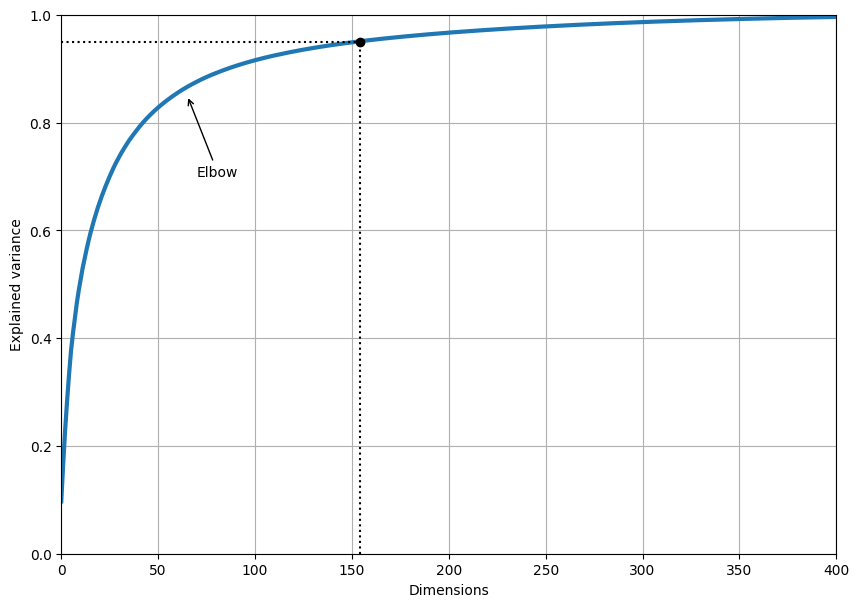

In [53]:
plt.figure(figsize=(10,7))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel('Dimensions')
plt.ylabel("Explained variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext = (70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(PCA(),
                         RandomForestClassifier(random_state=42))

param_grid = {
    "pca__n_components" : np.arange(10,80),
    "randomforestclassifier__n_estimators" : np.arange(50,500)
}

rscv = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=3)
rscv.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 6...
       401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])})

In [55]:
rscv.best_params_

{'randomforestclassifier__n_estimators': np.int64(348),
 'pca__n_components': np.int64(45)}

In [56]:
cumsum[76]

np.float64(0.8860915790080389)

In [57]:
rscv.score(X_test, y_test)

0.8606

In [58]:
print(rscv.best_params_)

{'randomforestclassifier__n_estimators': np.int64(348), 'pca__n_components': np.int64(45)}


In [59]:
rscv.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=np.int64(45))),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=np.int64(348),
                                        random_state=42))])

In [60]:
rscv.best_estimator_.score(X_train, y_train), rscv.best_estimator_.score(X_test, y_test)

(1.0, 0.9562)

In [61]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

sgd_pipeline = make_pipeline(PCA(random_state=42),
                             SGDClassifier(random_state=42))

sgd_param_grid = {
    "pca__n_components" : np.arange(10,80)
}

sgd_gscv = GridSearchCV(sgd_pipeline, sgd_param_grid, cv=3)
sgd_gscv.fit(X_train[:1_000], y_train[:1_000])


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

PCA for compression

In [62]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):        # X_train datasini n_batches sayina bolur
  inc_pca.partial_fit(X_batch)              # adi fit de yenisini oyrendikce kohneni unudur, amma partial fit olanda oyrendiyinin uzerinden davam edir

X_reduced = inc_pca.transform(X_train)

LLE

In [63]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

Hands-on

In [64]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')        # parser ozu duzgun bolsun deye verilir
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [65]:
from sklearn.manifold import TSNE

In [69]:
tsne = TSNE(n_components=2)

result = tsne.fit_transform(X_train[:5000])

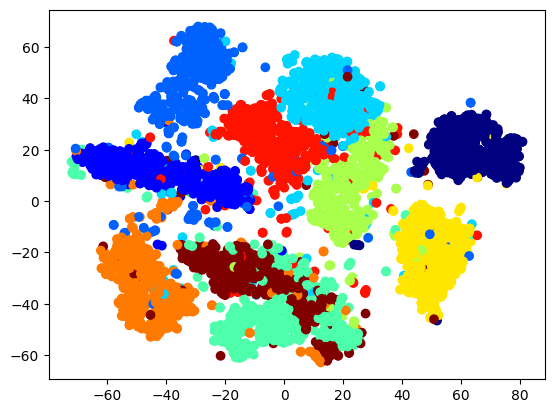

In [70]:
plt.scatter(result[:,0],result[:,1],c=list(map(lambda x: int(x), y_train[:5000])),cmap = 'jet')

In [71]:
result.shape

(5000, 2)

In [72]:
y_train[:5000]

array(['5', '0', '4', ..., '2', '1', '2'], dtype=object)

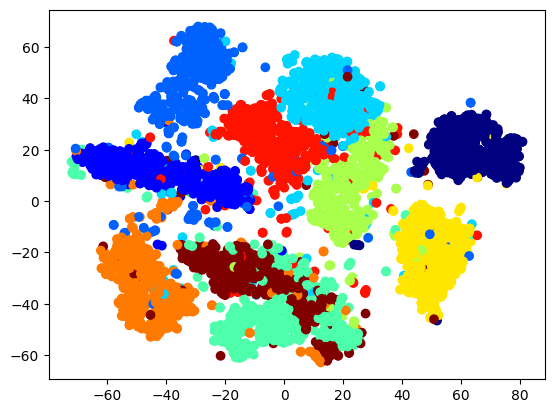

In [74]:
plt.scatter(result[:,0], result[:,1], c=list(map(lambda x: int(x), y_train[:5000])), cmap="jet")